In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [4]:
ri.initialize(use_config=False)

Reinitializing system
Deprogramming
Programming iq2xpfb14mcr6_2015_May_11_2241.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 512.8 MHz
starting udp server process on PPC
ssh root@roach "nohup /boffiles/udp/kid_ppc 2951 < /dev/null &> /dev/null &"


In [5]:
ri.set_fft_gain(2)

In [6]:
ri.set_lo(1200)

In [11]:
ri.set_dac_atten(63)

In [26]:
x,y = ri.get_raw_adc()

In [27]:
x.std()

19.703895832081852

In [28]:
x.ptp()

150.0

(0.0001, 0.1)

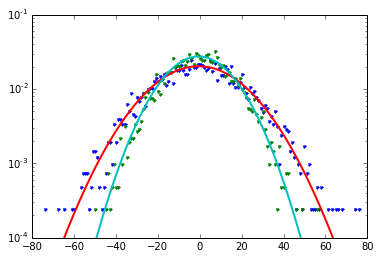

In [49]:
h,b = np.histogram(x,bins=np.arange(-80,80),normed=True)
h2,b = np.histogram(y,bins=np.arange(-80,80),normed=True)
semilogy(b[:-1],h,'.')
semilogy(b[:-1],h2,'.')

t = np.arange(-80,80)
plot(t,np.exp(-((t-x.mean())/(np.sqrt(2)*x.std()))**2)/np.sqrt(2*np.pi*x.std()**2),lw=2)
plot(t,np.exp(-((t-y.mean())/(np.sqrt(2)*y.std()))**2)/np.sqrt(2*np.pi*y.std()**2),lw=2)
ylim(1e-4,1e-1)

(-80.0, 80.0, -60.0, 60.0)

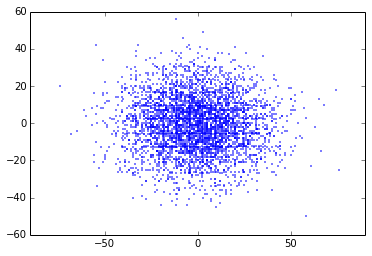

In [46]:
plot(x,y,'.',markersize=2)
axis('equal')

In [37]:
(x+1j*y).std()

24.502465328429054

In [38]:
(x+1j*y).mean()

(-0.62939453125-0.58642578125j)

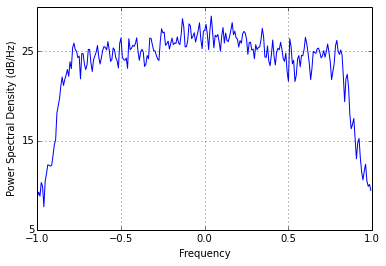

In [39]:
blah = psd(x+1j*y)

In [51]:
ri.set_tone_freqs(np.array([64])+ri.lo_frequency+256./2**17,nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1264.00195312])

In [52]:
ri.select_fft_bins([0])

In [53]:
d,addr = ri.get_data(8)

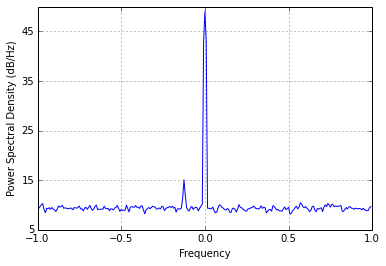

In [54]:
blah = psd(d[:,0])

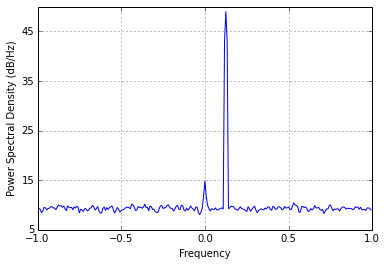

In [59]:
ri.set_dac_atten(63)
d,addr = ri.get_data(8,demod=False)
blah = psd(d[:,0])

In [60]:
import time

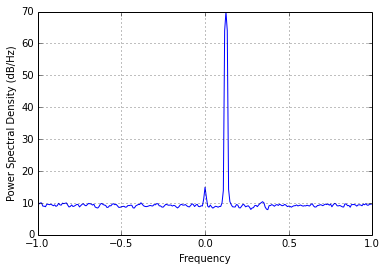

In [65]:
ri.set_dac_atten(30)
time.sleep(1)
d,addr = ri.get_data(8,demod=False)
blah = psd(d[:,0])

In [62]:
x,y = ri.get_raw_adc()

In [63]:
x.std()

70.868070420080841

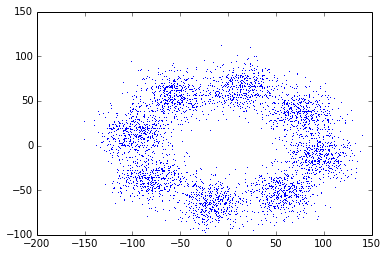

In [64]:
plot(x,y,',')